# Artificial Intelligence for Robotics 04

## General Information:
Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.

If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.

When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via Kernel -> Restart & Run All).

Code cells where you are supposed to give your answer often include the line `raise NotImplementedError`. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.

## Submission:
Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are **due on Monday at 20:00**.

## Group Work:
Please enter your UID (your username here) and those of your group partners into the next cell. We apply plagiarism checking, so do not submit others solutions! If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.

## Questions about the Assignment:
If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions!

### Please add the usernames of all your team members in the manner member1, member2 in next cell (example given below)

member1 = 'example'

member2 = 'example2'

#### If you are not working in a group, then please add member2 as none2s

In [1]:
# YOUR CODE HERE
member1 = 'bghamk2s'

member2 = 'mgadal2s'

In [2]:
# Execute this cell to make sure you correctly filled in the usernames of the team members

def group_name_test():
    for member_id in [member1, member2]:
        assert isinstance(member_id, str), "Please give your member id as a string."
        assert len(member_id) > 0, "You need to fill in the member id for both members"
        assert member_id.endswith("2s"), "The member id should end with 2s (Your JupyterHub username)"

group_name_test() 
print("All tests passed!")

All tests passed!


# Task 1

**[18 Point(s)]**


# A* Theory [20 Points]

During the lecture, you have learned about the A* search algorithm and its propoerties. Please answere the following questions short and consice and be as precise as possible.


## Task 1.1

**[2 Point(s)]**

### Completeness [2 Points]

How is the *completeness* of an algorithm defined? Is A* complete?

An algorithm is complete if it terminates with a solution when one exists given enough resources.

If the search space is not infinite and the heuristic is admissible then it will always return a solution and is complete otherwise if graph or branching factor is infinite and heuristic can be for example negative then it is not complete.

## Task 1.2

**[2 Point(s)]**

### Soundness [2 Points]

When is an algorithm be considered *sound*? Is A* sound?

YOUR ANSWER HERE

## Task 1.3

**[2 Point(s)]**

### Termination [2 Points]

When does A* end the search process?

when:<br>
1- it finds the goal<br>
2- fringe is empty<br>
3- if there is any limitation for resources

## Task 1.4

**[5 Point(s)]**

### Optimality [5 Points]

What does it mean when we say an algorithm is *optimal*? What are the criteria that have to be met in order for A* to be *optimal*? Provide an argument or proof on why this is required.

An algorithm is optimal when it is guarantied to return the least-cost path. <br>
A* is optimal if heuristic is: <br>
1- admissible: 
<br>2- consistent:


## Task 1.5

**[5 Point(s)]**

### Time Complexity [5 Points]

What is the time complexity of A*? Explain, or derive mathematically! Just writing $O(...)$ is not sufficient!

YOUR ANSWER HERE

## Task 1.6

**[2 Point(s)]**

### Consistency of a Heuristic [2 Points]

How is a consistent heuristic defined? Why is it a critical property in the context of the A* search algorithm?

YOUR ANSWER HERE

# Task 2

**[50 Point(s)]**

# Applying Informed Search [60 Points]

Informed methods help us gain information about solving a problem through its current state space. This keeps a program from blundering around blindly guessing. Informed search strategies make use of information about the path of moves we took to get where we are currently by using an *evaluation function*. This evaluation function often makes use of a *heuristic function*, that provides an estimate of the distance of a node to the goal in a relaxed version of the problem.

# A Real World Problem

Consider a robot that works in a warehouse. The robot can carry packages on top of itself on a set of omnidirectional conveyors. It can carry a maximum of 8 packages in a 3x3 grid, with one spot left open. There is a slot from which the robot can dispense packages onto shelves. The robot must deposit the packages in order, so they must be lined up in a certain order near the slot. However, workers place the packages onto the robot randomly. Therefore, the robot must first sort the packages before depositing them. It can use the free space and the conveyors to shift the packages horizontally and vertically. 

## This becomes what is known as the 8 puzzle.

## Task 2.1

**[15 Point(s)]**

## The 8 Puzzle [10 Points]

An 8 puzzle is a simple game consisting of a 3 x 3 grid (containing 9 squares). One of the squares is empty.
The object is to move the squares around into different positions and having the numbers displayed in the "goal state". The squares can obviously only move along the horizontal and vertical axis and only into the **empty tile**. Therefore the problem can also be viewed as the empty tile "trading" positions with one of its neighbouring tiles.

The image below depicts the goal state of an "3 x 3" 8 puzzle.
<img src="Informed_Search_files/img/8_puzzle.png" alt="8 Puzzle" width="200"/>

The complexity of possible moves toward the final solution in a game like this is large. With an uninformed search strategy, finding a solution to this problem can take a lot of time. The problem is now about finding the shortest path to the goal state within reasonable time, which we will do in this assignment using A* and Greedy Search.

### Task
- We will implement the 8 puzzle game as the class `Puzzle`
- Define methods for moving a tile around in the puzzle
- Define a mehod for generating all possible moves from one particular configuration.
- You are already provided with a class and function templates below. Please complete the implementation.

In [3]:
from typing import List, Tuple
from utils import print_puzzle

class Puzzle:

    def __init__(self, init_state: List[int], puzzle_type: int = 8):
        """
        Initialize a new 8-puzzle board
        :param init_state: Initial configuration of the board
        """
        self.init_state = init_state
        self.goal_state = [i for i in range(1, 9)] + [0]
        self.explored_set = set()
        self.fringe = []
        self.puzzle_type = puzzle_type

    def goal_test(self, state: List[int]):
        """Test if goal state is reached
        :param state: board configuration to check
        :return: true if the passed configuration is equal to goal configuration
        """
        # YOUR CODE HERE
        return state == self.goal_state

    def is_explored(self, state: List[int]):
        """Check if a particular board configuration has already been explored
        :param state: board configuration to check
        :return: true if a particular configuration has already been explored
        """
        # YOUR CODE HERE
        return state in self.explored_set

    def reset(self):
        # YOUR CODE HERE
        self.explored_set = set()


def move_left(position: int) -> int:
    """Move one position left in 8 puzzle if possible
    :param position: current position of the 0 tile
    :return: new position of the 0 tile after moving to the left
    """
    # YOUR CODE HERE
    return position + 1 if (position % 3) < 2 else position


def move_right(position: int) -> int:
    """Move one position right in 8 puzzle if possible
    :param position: current position of the 0 tile
    :return: new position of the 0 tile after moving to the right
    """
    # YOUR CODE HERE
    return position - 1 if (position % 3) > 0 else position


def move_up(position: int) -> int:
    """Move one position up in 8 puzzle if possible
    :param position: current position of the 0 tile
    :return: new position of the 0 tile after moving upwards
    """
    # YOUR CODE HERE
    return position + 3 if (position // 3) < 2 else position


def move_down(position: int):
    """Move one position down in 8 puzzle if possible
    :param position: current position of the 0 tile.
    :return: new position of the 0 tile after moving downwards
    """
    # YOUR CODE HERE
    return position - 3 if (position // 3) > 0 else position


def get_possible_moves(state: List[int]) -> List[List[int]]:
    """Check whether a move is possible in left, right, up, down direction and store it.
    :param state: current configuration of the puzzle as one dimensional list
    :return: list containing the new configurations after applying all possible moves
    """
    # YOUR CODE HERE
    current_empty_tile = state.index(0)

    def apply_move(move):
        new_empty_tile = move(current_empty_tile)
        if new_empty_tile != current_empty_tile:
            new_state = state.copy()
            new_state[current_empty_tile], new_state[new_empty_tile] = new_state[new_empty_tile], new_state[
                current_empty_tile]
            return new_state

    move_lists = [apply_move(move_left), apply_move(move_right), apply_move(move_up), apply_move(move_down)]
    possible_moves = [move for move in move_lists if move is not None]

    return possible_moves


# YOUR CODE HERE
class Node:
    def __init__(self, state: List[int], g: int, f: int, parent=None):
        self.state = state
        self.g = g  # Cost to reach this state
        self.f = f  # Estimated total cost. (g + h) for A* and h for best first search
        self.parent = parent  # Parent node

    def __lt__(self, other):
        return self.f < other.f


## Task 2.2

**[5 Point(s)]**

## Heuristics [5 Points]

In this part, you are tasked to implement two different admissible heuristics for the 8 puzzle: The [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) and the [Manhattan Distance](https://en.wikipedia.org/wiki/Taxicab_geometry).

**Hamming Distance**  
Let $A$ be an alphabet of symbols and $C$ a subset of $A^n$, the set of worlds of length $n$ over $A$. Let $u = (u_1, ..., u_n)$ and $v = (v_1, ...,v_n)$. The Hamming distance is deinfed as the number of places in which $u$ and $v$ differ. That is:
$$h(n) = \{i:u_i \neq v_i,i=1,...,n\}$$
See also: [Encyclopedia of Math](https://encyclopediaofmath.org/wiki/Hamming_distance)

It is clear that this heuristic is admissible since the total number of moves to order the tiles correctly is at least the number of misplaced tiles (each tile not in place must be moved at least once). The cost (number of moves) to the goal (an ordered puzzle) is at least the Hamming distance of the puzzle.

**Manhattan Distance**  
The Manhattan distance between two points $x = (x_1, ..., x_n)$ and $y = (y_1, ..., y_n)$ in $n$-dimensional space is the sum of the distances in each dimension.
$$d(x,y) = \sum^n_{i=1} \vert x_i - y_i \vert$$
See also: [Encyclopedia of Machine Learning](https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_506)

The Manhattan distance is an admissible heuristic because every tile will have to be moved at least the number of spots in between itself and its correct position.

### Task
- You are provided with the function definitions for the two heuristics below
- Please implement them according to the mathematical definition given above

In [4]:
from typing import Tuple, List

def hamming_distance(state: List[int]) -> int:
    """Calculate the Hamming distance for a particular configuration
    :param state: current configuration of the puzzle
    :return: the number of misplaced tiles in the given configuration
    """
    # YOUR CODE HERE
    goal_state = [i for i in range(1, 9)] + [0]
    return len([x for (x, y) in zip(state, goal_state) if x != y])


def manhattan_distance(state: List[int]) -> int:
    """Function to calculate the manhattan distance for a
    particular configuration
    :param state: current configuration of the puzzle
    :return: the accumulated manhattan distance between each tile and its goal position in the given configuration
    """
    # YOUR CODE HERE
    goal_state = [i for i in range(1, 9)] + [0]
    distance = 0
    for i in state:
        goal_i = goal_state.index(i)
        state_i = state.index(i)
        goal_x, goal_y = goal_i // 3, goal_i % 3
        state_x, state_y = state_i // 3, state_i % 3

        distance += abs(goal_x - state_x) + abs(goal_y - state_y)

    return distance

In [5]:
# Run this test cell in order to get an indication of whether your implementation is working as expected.
assert hamming_distance([0,1,2,3,4,5,8,6,7]) == 9
assert manhattan_distance([1,2,3,4,0,5,6,8,7]) == 8

## Task 2.3

**[10 Point(s)]**

## A* Search Algorithm [10 Points]

Now you will implement the A* search algorithm. To do that, you can consider the pseudocode from the lecture

```
function A*(problem) returns a solution, or failure
    closed ← an empty set
    fringe ← a list containing Make-Node(Initial-State[problem])
    loop do
        if fringe is empty then return failure
        node ← Remove-Front(fringe)
        if Goal-Test[problem] applied to State(node) succeeds return node
            insert node into closed
        for each node n ∈ Expand(node, problem) do
            if there is a node m ∈ closed ∪ fringe such that
                STATE(m) = STATE(n) and f(m) ≤ f(n)
            then do nothing
            else
                insert n into fringe after the last node m such that f(m) ≤ f(n)
end
```

### Task
- You are provided with the function definition for the A* function
- Please implement A* according to the algorithm design discussed in the lectures

In order to get an estimation on whether your solution work as expected, there is a public test available in the test cell. Make sure that all dependent cells are executed first, otherwise some functions or variables might not exist and an error will occur.

In [8]:
from typing import Callable, List, Tuple
from heapq import heappop, heappush

def astar_search(board: Puzzle, heuristic: Callable) -> Tuple[List[int], int]:
    """
    :param board: the 8-puzzle to solve
    :param heuristic: the heuristic function to use
    :return: an ordered list with the solution path and the number of total nodes expanded
    """
    # YOUR CODE HERE
    start_node = Node(board.init_state, 0, heuristic(board.init_state))
    board.fringe = [start_node]

    while board.fringe:
        current_node = heappop(board.fringe)
        current_state = current_node.state

        if board.goal_test(current_state):
            # Reconstruct the solution path
            solution_path = [current_state]
            while current_node.parent:
                current_node = current_node.parent
                solution_path.append(current_node.state)
            solution_path.reverse()
            return solution_path, len(board.explored_set)

        board.explored_set.add(tuple(current_state))

        for new_state in get_possible_moves(current_state):
            if tuple(new_state) not in board.explored_set:
                new_g = current_node.g + 1
                new_f = new_g + heuristic(new_state)
                new_node = Node(new_state, new_g, new_f, parent=current_node)
                heappush(board.fringe,  new_node)

    return [], len(board.explored_set)

In [9]:
# Run this test cell in order to get an INDICATION of whether your implementation is working as expected.
import time
t0 = time.time()
p = Puzzle([0,1,2,3,4,5,8,6,7])
path, expanded_nodes = astar_search(p, manhattan_distance)
t1 = time.time()
assert len(path) == 23
# The execution time is limited to 10min, so please keep this in mind when implementing your solution!
assert t1-t0 <= 600

## Task 2.4

**[10 Point(s)]**

## Greedy Search [10 Points]

Now we will implement a *greedy search algorithm*. Recall from the lecture, that the evaluation function $f(n)$ is defined as $f(n) = h(n)$, with $h(n)$ being the heuristic function.

### Task
- You are provided with the definition of the greedy search function
- Implement a greedy search strategy by completing the function below

In order to get an estimation on whether your solution work as expected, there is a public test available in the test cell. Make sure that all dependent cells are executed first, otherwise some functions or variables might not exist and an error will occur.

In [10]:
from typing import List, Tuple, Callable

def greedy_search(board: Puzzle, heuristic: Callable) -> Tuple[List[int], int]:
    """Implementation of the greedy search algorithm.
    :param board: the 8-puzzle to solve
    :param heuristic: the heuristic function to use
    :return: an ordered list with the solution path and the number of total nodes expanded 
    """
    # YOUR CODE HERE
    start_node = Node(board.init_state, 0, heuristic(board.init_state))
    heappush(board.fringe,  start_node)

    while board.fringe:
        current_node = heappop(board.fringe)
        current_state = current_node.state

        if board.goal_test(current_state):
            # Reconstruct the solution path
            solution_path = [current_state]
            while current_node.parent:
                current_node = current_node.parent
                solution_path.append(current_node.state)
            solution_path.reverse()
            return solution_path, len(board.explored_set)

        board.explored_set.add(tuple(current_state))

        for new_state in get_possible_moves(current_state):
            if tuple(new_state) not in board.explored_set:
                new_f = heuristic(new_state)
                new_node = Node(new_state, 0, new_f, parent=current_node)
                heappush(board.fringe, new_node)

    return [], len(board.explored_set)



In [11]:
# Run this test cell in order to get an INDICATION of whether your implementation is working as expected.
import time
t0 = time.time()
p = Puzzle([0,1,2,3,4,5,8,6,7])
path, expanded_nodes = greedy_search(p, manhattan_distance)
t1 = time.time()
# The execution time is limited to 10min, so please keep this in mind when implementing your solution!
assert t1-t0 <= 600

## Task 2.5

**[5 Point(s)]**

## Evaluation A) [5 Points]

Now we want to compare the performance of the different solvers. For that, run every combination of `algorithm` x `heuristic` with the puzzle configurations
1. `[0, 1, 2, 3, 4, 5, 8, 6, 7]`
1. `[8, 7, 6, 5, 1, 4, 2, 0, 3]`
1. `[1, 5, 7, 3, 6, 2, 0, 4, 8]`

for each run, record the `expanded nodes`, `execution time` and the `path cost`.
```
[
  {
    'puzzle': 1,
    'algorithm': 'astar',
    'heuristic': 'manhattan',
    'expanded nodes': 0,
    'execution time': 0.0,
    'path cost': 0
  }
]
```

In [20]:
evaluation_results = []

# YOUR CODE HERE
def run_evaluation(puzzle_configs, heuristic, algorithm):

    """it solves each configuration with given algorithm and given heuristic
    :param puzzle_configs: dictionary, all the given puzzle configurations. {index: puzzle}
    :param heuristic: the heuristic function to use.  
    :param algorithm: the search algorithm to use.
    :return: a list of recordes. each record is a dictionary.
    """
    records = []
    for i in puzzle_configs.keys():
        t0 = time.time()
        p = Puzzle(puzzle_configs[i])
        path, expanded_nodes = algorithm(p, heuristic)
        t1 = time.time()

        records.append({
            'puzzle': i,
            'algorithm': algorithm.__name__,
            'heuristic': heuristic.__name__,
            'expanded nodes': expanded_nodes,
            'execution time': t1 - t0,
            'path cost': len(path)})
    return records


def evaluate(puzzle_configs):
    
    """Runs every combination of algorithm x heuristic with the puzzle configurations and prints  the results.
    :param puzzle_configs: dictionary, all the given puzzle configurations. {index: puzzle}
    """
    heuristics = [manhattan_distance, hamming_distance]
    search_algorithms = [astar_search, greedy_search]
    evaluation_results = []

    for heuristic in heuristics:
        for algorithm in search_algorithms:
            eval_records = run_evaluation(puzzle_configs, heuristic, algorithm)
            for record in eval_records:
                evaluation_results.append(record)
    
    return evaluation_results



        
puzzle_configs = [[0, 1, 2, 3, 4, 5, 8, 6, 7],
                  [8, 7, 6, 5, 1, 4, 2, 0, 3],
                  [1, 5, 7, 3, 6, 2, 0, 4, 8]]

puzzle_dict = {}

for index, config in enumerate(puzzle_configs):
    puzzle_dict[index] = config

evaluation_results = evaluate(puzzle_dict)
for record in evaluation_results:
    print(record)


{'puzzle': 0, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 1270, 'execution time': 0.027159690856933594, 'path cost': 23}
{'puzzle': 1, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 9954, 'execution time': 0.24588298797607422, 'path cost': 30}
{'puzzle': 2, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 712, 'execution time': 0.014292716979980469, 'path cost': 23}
{'puzzle': 0, 'algorithm': 'greedy_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 192, 'execution time': 0.002690553665161133, 'path cost': 51}
{'puzzle': 1, 'algorithm': 'greedy_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 179, 'execution time': 0.002483367919921875, 'path cost': 62}
{'puzzle': 2, 'algorithm': 'greedy_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 140, 'execution time': 0.0019690990447998047, 'path cost': 45}
{'puzzle': 0, 'algorithm': 'astar_search', 'heu

## Task 2.6

**[5 Point(s)]**

## Evaluation B) [5 Points]
Lastly, we want to get an estimate on how well the solvers are performing in general. For that, we first have to define a measue of *difficulty* of an initial configuration and whether ther exists a solution at all. 

### Inversions and Solvability of the 8 and 15 Puzzle
The difficulty of an 8 puzzle configuration can be acessed by counting the number of inversions it contains with respect to the goal configuration. If the square containing the number $i$ appears "before" (reading the squares in the box from left to right and top to bottom) $n$ numbers that are less than $i$, then call it an inversion of order $n$, and denote it $n_i$. Then define
$$N=\sum_{i=1}^8n_i = \sum_{i=2}^8n_i$$
where the sum only needs to run from 2 to 8, since there are no numbers less than 1 (so $n_1$ must equal 0). Stated more simply, $N = i(p)$ is the number of *permuted inversions* in the list of numbers.

For the **15 puzzle** there actually exists a proof, which in its principles also holds for the 8 puzzle in modified form:  
We additionaly define $e$ to be the row number of the empty square. Then if $N + e$ is even, then the configuration is solvable, otherwise it is not. In other words, if the permutation symbol $(-1)^{i(p)}$ of the list is $+1$, the configuration is solvable, whereas if the signature is -1, it is not. This can be formally proved using *alternating groups*.

For more details, check out this article by [MathWorld](https://mathworld.wolfram.com/15Puzzle.html)

> While odd permutations of the puzzle are impossible to solve (Johnson 1879), all even permutations are solvable (Story 1879).

With those definitions it now becomes possible to evaluate the general performance of the solvers with respect to the complexity of the initial configuration.

1. Compelte the `inversion` function below, such that it calculates the total number of inversions in a puzzle configuration.
1. Use the `inversion` function in order to complete the `is_solvable` function, which should return either `True` or `False` depending on whether a configuration is solvable or not.
1. Generate 100 random **solvable** puzzle configurations
1. Solve each configuration with every combination of `algorithm` and `heuristic` and again record the `expanded nodes`, `execution time` and the `path cost`, as well as the `complexity`, which is the total inversion count of the initial configuration.
1. Plot the metrics over the `complexity` of the puzzle's initial configuration

{'puzzle': 0, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 587, 'execution time': 0.010325908660888672, 'path cost': 22, 'complexity': 18}
{'puzzle': 1, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 1872, 'execution time': 0.02961564064025879, 'path cost': 24, 'complexity': 8}
{'puzzle': 2, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 5043, 'execution time': 0.07601737976074219, 'path cost': 27, 'complexity': 24}
{'puzzle': 3, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 1581, 'execution time': 0.024777889251708984, 'path cost': 23, 'complexity': 4}
{'puzzle': 4, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 1859, 'execution time': 0.027276992797851562, 'path cost': 24, 'complexity': 10}
{'puzzle': 5, 'algorithm': 'astar_search', 'heuristic': 'manhattan_distance', 'expanded nodes': 1816, 'execution time': 

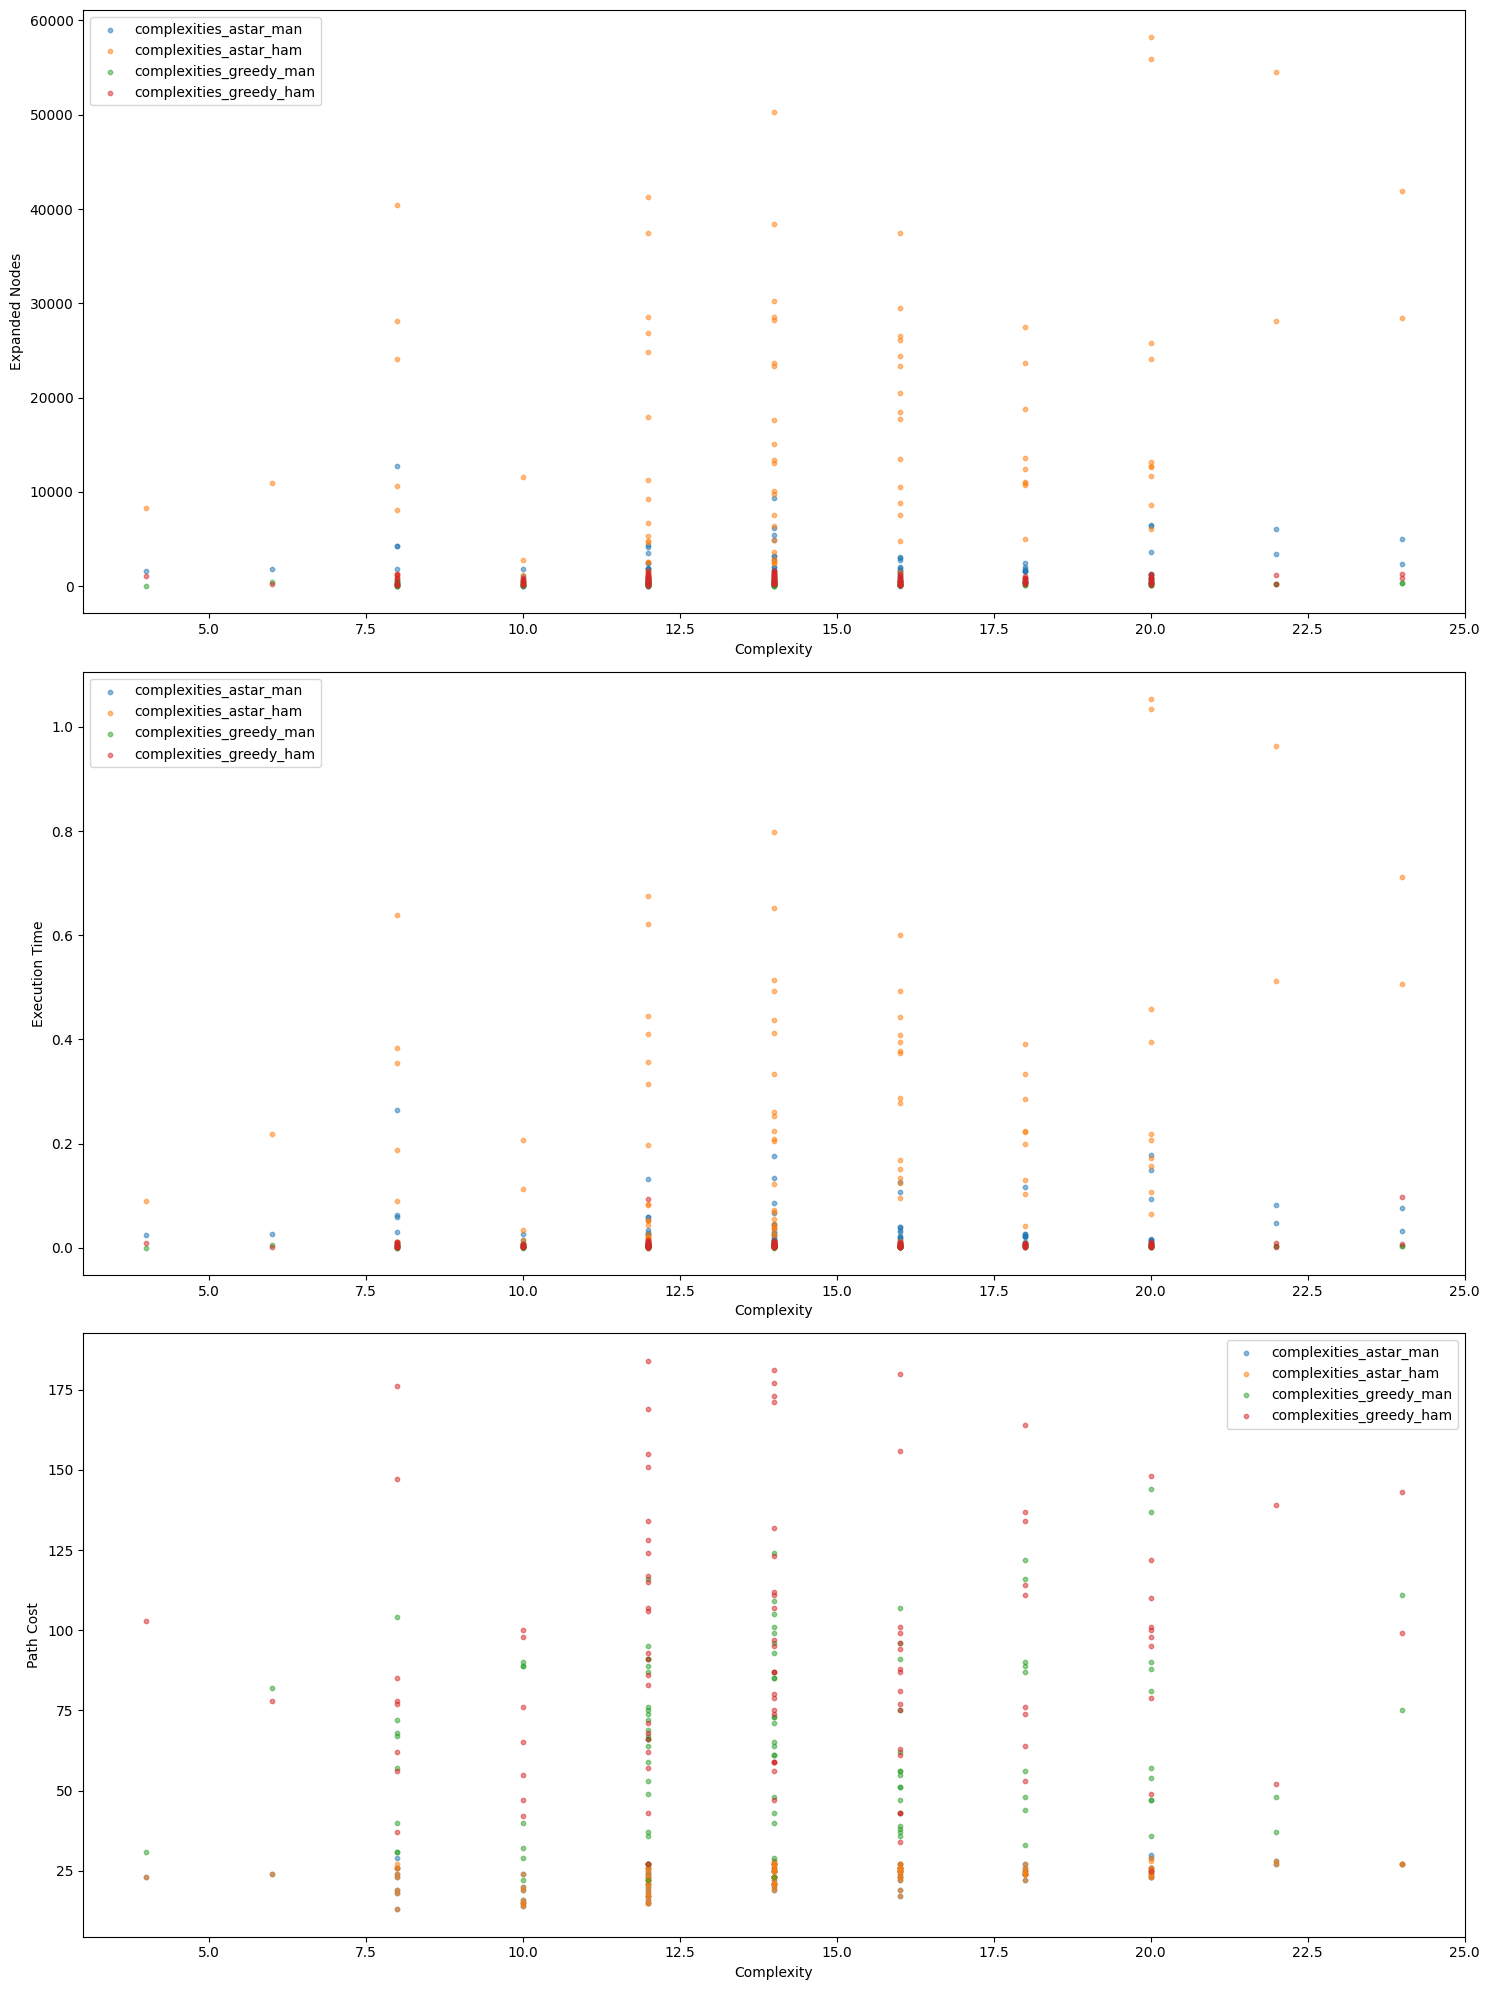

In [38]:
import matplotlib.pyplot as plt
import random

def inversion(configuration: List[int]) -> int:
    """
    Finds all inversions in a puzzle configuration and returns their total number
    :param configuration: the configuration of the 8 puzzle to count its inversions
    :returns: number of inversions in the puzzle configuration
    """
    # YOUR CODE HERE
    inversion_count = 0
    for i in range(len(configuration)):
        for j in range(i + 1, len(configuration)):
            if configuration[i] != 0 and configuration[j] != 0 and configuration[i] > configuration[j]:
                inversion_count += 1
    return inversion_count


def is_solvable(configuration: List[int]) -> bool:
    """
    Checks whether a given puzzle configuration is solvable or not
    :param configuration: the initial configuration of the puzzle to check for solvability
    :returns: True if the configuration is solvable; False otherwise
    """
    # YOUR CODE HERE
    inversion_count = inversion(configuration)

    return inversion_count % 2 == 0


# YOUR CODE HERE

def run_evaluation(puzzle_configs, heuristic, algorithm):
    
    records = []
    for i in puzzle_configs.keys():
        t0 = time.time()
        p = Puzzle(puzzle_configs[i])
        path, expanded_nodes = algorithm(p, heuristic)
        t1 = time.time()

        records.append({
            'puzzle': i,
            'algorithm': algorithm.__name__,
            'heuristic': heuristic.__name__,
            'expanded nodes': expanded_nodes,
            'execution time': t1 - t0,
            'path cost': len(path),
            'complexity': inversion(puzzle_configs[i])})
    return records

def generate_puzzle():
    """
    Generate a random solvable puzzle configuration.

    Returns:
    :puzzle: A list representing the puzzle configuration
    """
    puzzle = list(range(9))
    random.shuffle(puzzle)
    while not is_solvable(puzzle):
        random.shuffle(puzzle)
    return puzzle

def generate_solvable_puzzles(total):
    return [generate_puzzle() for i in range(total)]



puzzle_configs = generate_solvable_puzzles(100)
puzzle_dict = {}

for index, config in enumerate(puzzle_configs):
    puzzle_dict[index] = config

evaluation_results = evaluate(puzzle_dict)
for record in evaluation_results:
    print(record)




# Plotting

# Extracting data for plotting
complexities_astar_man = [result['complexity'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'manhattan_distance']
complexities_astar_ham = [result['complexity'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'hamming_distance']
complexities_greedy_man = [result['complexity'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'manhattan_distance']
complexities_greedy_ham = [result['complexity'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'hamming_distance']

expanded_nodes_astar_man  = [result['expanded nodes'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'manhattan_distance']
expanded_nodes_astar_ham  = [result['expanded nodes'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'hamming_distance']
expanded_nodes_greedy_man = [result['expanded nodes'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'manhattan_distance']
expanded_nodes_greedy_ham = [result['expanded nodes'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'hamming_distance']

execution_times_astar_man  = [result['execution time'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'manhattan_distance']
execution_times_astar_ham  = [result['execution time'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'hamming_distance']
execution_times_greedy_man = [result['execution time'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'manhattan_distance']
execution_times_greedy_ham = [result['execution time'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'hamming_distance']

path_costs_times_astar_man  = [result['path cost'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'manhattan_distance']
path_costs_times_astar_ham  = [result['path cost'] for result in evaluation_results if result['algorithm'] == 'astar_search' and result['heuristic'] == 'hamming_distance']
path_costs_times_greedy_man = [result['path cost'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'manhattan_distance']
path_costs_times_greedy_ham = [result['path cost'] for result in evaluation_results if result['algorithm'] == 'greedy_search' and result['heuristic'] == 'hamming_distance']

# Plotting
plt.figure(figsize=(15, 20))

plt.subplot(3, 1, 1)
l1 = plt.scatter(complexities_astar_man, expanded_nodes_astar_man, alpha=0.5, s = 10)
l2 = plt.scatter(complexities_astar_ham, expanded_nodes_astar_ham, alpha=0.5, s = 10)
l3 = plt.scatter(complexities_greedy_man, expanded_nodes_greedy_man, alpha=0.5, s = 10)
l4 = plt.scatter(complexities_greedy_ham, expanded_nodes_greedy_ham, alpha=0.5, s = 10)
plt.legend([l1,l2,l3,l4],["complexities_astar_man", "complexities_astar_ham", "complexities_greedy_man", "complexities_greedy_ham"])
plt.xlabel('Complexity')
plt.ylabel('Expanded Nodes')

plt.subplot(3, 1, 2)
l1 = plt.scatter(complexities_astar_man, execution_times_astar_man, alpha=0.5, s = 10)
l2 = plt.scatter(complexities_astar_ham, execution_times_astar_ham, alpha=0.5, s = 10)
l3 = plt.scatter(complexities_greedy_man, execution_times_greedy_man, alpha=0.5, s = 10)
l4 = plt.scatter(complexities_greedy_ham, execution_times_greedy_ham, alpha=0.5, s = 10)
plt.legend([l1,l2,l3,l4],["complexities_astar_man", "complexities_astar_ham", "complexities_greedy_man", "complexities_greedy_ham"])
plt.xlabel('Complexity')
plt.ylabel('Execution Time')

plt.subplot(3, 1, 3)
l1 = plt.scatter(complexities_astar_man, path_costs_times_astar_man, alpha=0.5, s = 10)
l2 = plt.scatter(complexities_astar_ham, path_costs_times_astar_ham, alpha=0.5, s = 10)
l3 = plt.scatter(complexities_greedy_man, path_costs_times_greedy_man, alpha=0.5, s = 10)
l4 = plt.scatter(complexities_greedy_ham, path_costs_times_greedy_ham, alpha=0.5, s = 10)
plt.legend([l1,l2,l3,l4],["complexities_astar_man", "complexities_astar_ham", "complexities_greedy_man", "complexities_greedy_ham"])
plt.xlabel('Complexity')
plt.ylabel('Path Cost')

plt.tight_layout()
plt.show()